In [ ]:
import numpy as np

In [ ]:
def step_function(x):
    return 1 if x >= 0 else 0

In [ ]:
# Perceptron learning algorithm
def perceptron_learning_algorithm(inputs, outputs, learning_rate=0.1, epochs=100):
    weights = np.random.rand(len(inputs[0]))
    errors = []

    for _ in range(epochs):
        total_error = 0
        for i in range(len(inputs)):
            predicted = step_function(np.dot(inputs[i], weights))
            error = outputs[i] - predicted
            total_error += error
            weights += learning_rate * error * inputs[i]
        errors.append(total_error)

        if total_error == 0:
            break

    return weights, errors

In [ ]:
# OR gate implementation
inputs_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs_or = np.array([0, 1, 1, 1])

# Adjusted learning rate and epochs
weights_or, errors_or = perceptron_learning_algorithm(inputs_or, outputs_or, learning_rate=0.1, epochs=1000)

# AND gate implementation
inputs_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs_and = np.array([0, 0, 0, 1])

# Adjusted learning rate and epochs
weights_and, errors_and = perceptron_learning_algorithm(inputs_and, outputs_and, learning_rate=0.1, epochs=1000)

# Test the OR and AND gates

In [ ]:
# Test the OR and AND gates
def test_gate(inputs, weights):
    for i in range(len(inputs)):
        output = step_function(np.dot(inputs[i], weights))
        print(f"Input: {inputs[i]} Output: {output}")

print("OR Gate:")
test_gate(inputs_or, weights_or)

print("\nAND Gate:")
test_gate(inputs_and, weights_and)

OR Gate:
Input: [0 0] Output: 1
Input: [0 1] Output: 1
Input: [1 0] Output: 1
Input: [1 1] Output: 1

AND Gate:
Input: [0 0] Output: 1
Input: [0 1] Output: 1
Input: [1 0] Output: 1
Input: [1 1] Output: 1


**question 2**

1. load the data set

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('horseRacing.csv')

2. clean the dataset

In [ ]:
df = df.drop_duplicates()
df = df.dropna()
df['calc_position'].fillna(df['calc_position'].mean(), inplace=True)
df['price'].fillna(df['price'].mean(), inplace=True)

<ipython-input-8-b2149c2b845d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['calc_position'].fillna(df['calc_position'].mean(), inplace=True)
<ipython-input-8-b2149c2b845d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'].fillna(df['price'].mean(), inplace=True)


In [ ]:


q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df = df[(df['price'] > lower_bound) & (df['price'] < upper_bound)]

In [ ]:
df.rename(columns={'calc_position': 'calculation_position', 'price': 'price_value'}, inplace=True)

In [ ]:
df['race_id'] = df['race_id'].astype(int)
df['horse_id'] = df['horse_id'].astype(int)
df['calculation_position'] = df['calculation_position'].astype(float)
df['price_value'] = df['price_value'].astype(float)

In [ ]:
invalid_values = df[df['price_value'] < 0]

if not invalid_values.empty:
    df = df[df['price_value'] >= 0]

3. covert the labels


In [ ]:

for col in df.select_dtypes(include='number').columns:
    df[col] = df[col].apply(lambda x: 0 if x <= 0 else 1)

4. visualize the data set

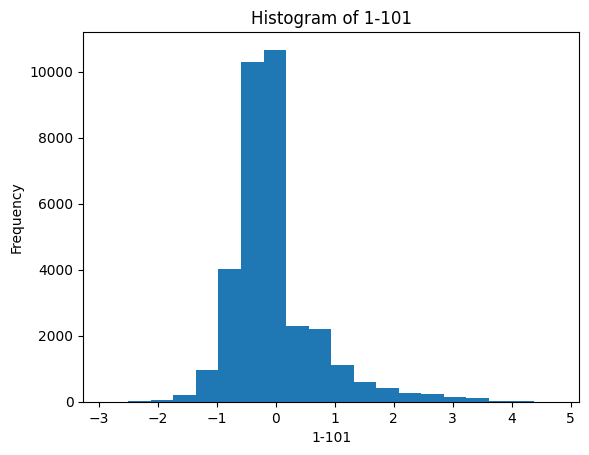

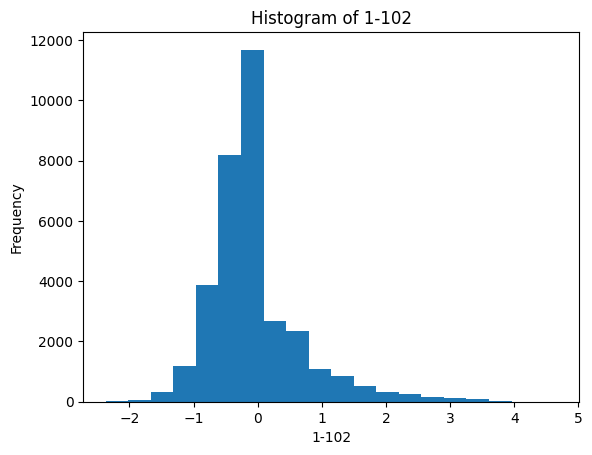

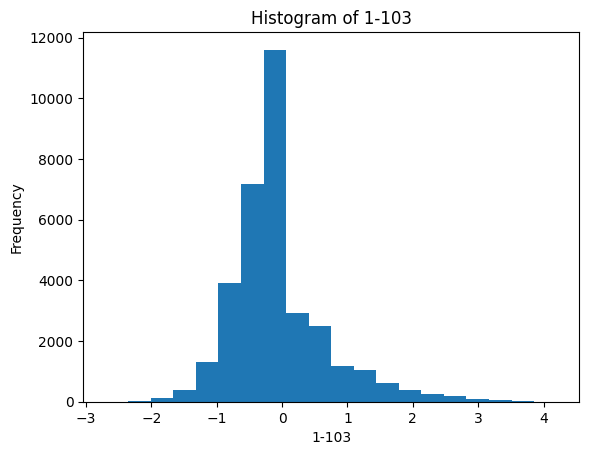

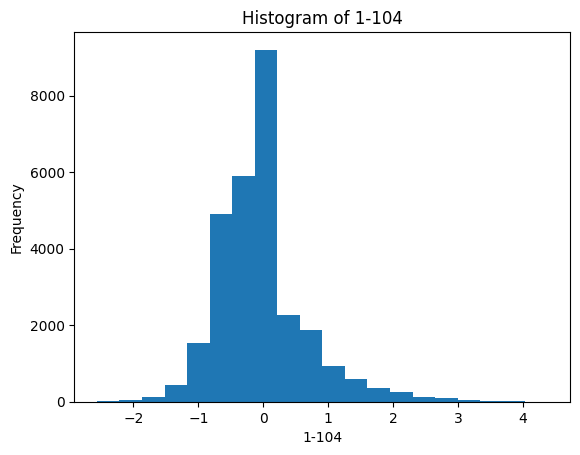

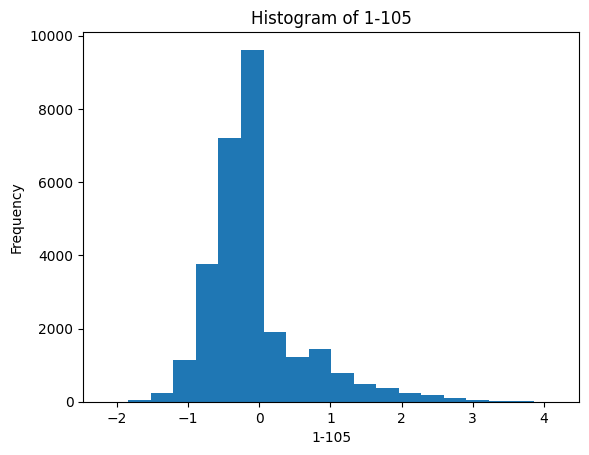

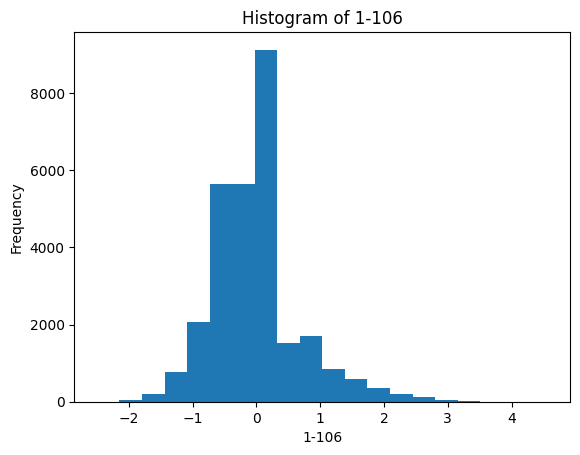

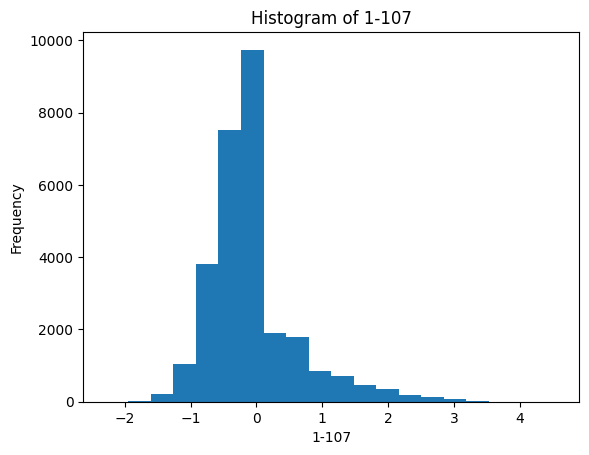

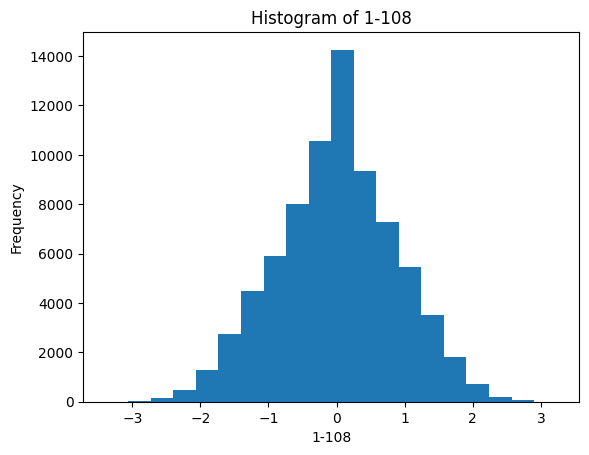

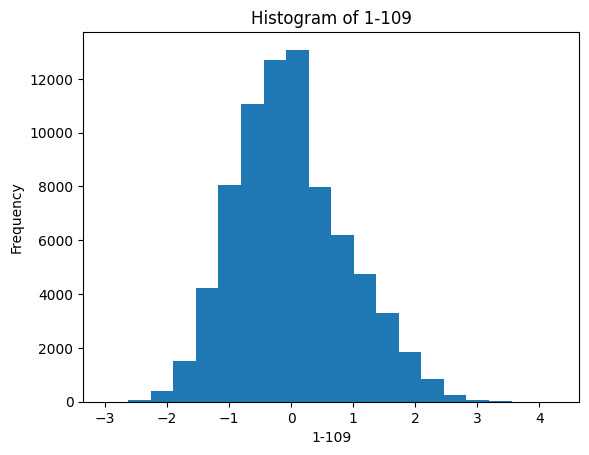

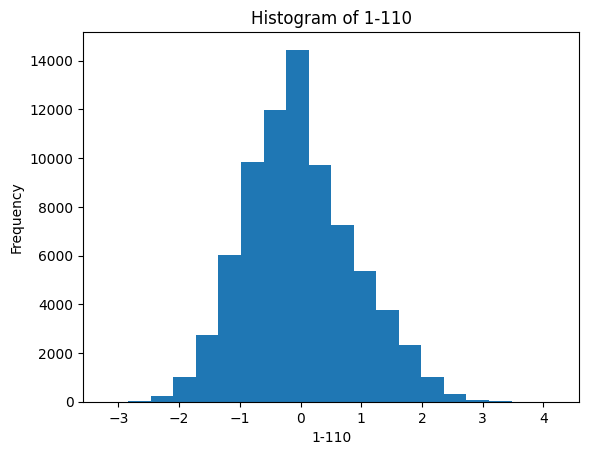

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Select the first 10 numerical columns
num_cols = ['1-101', '1-102', '1-103', '1-104', '1-105', '1-106', '1-107', '1-108', '1-109', '1-110']

# Plot histograms for the selected columns
for col in num_cols:
    plt.figure()
    plt.hist(df[col], bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

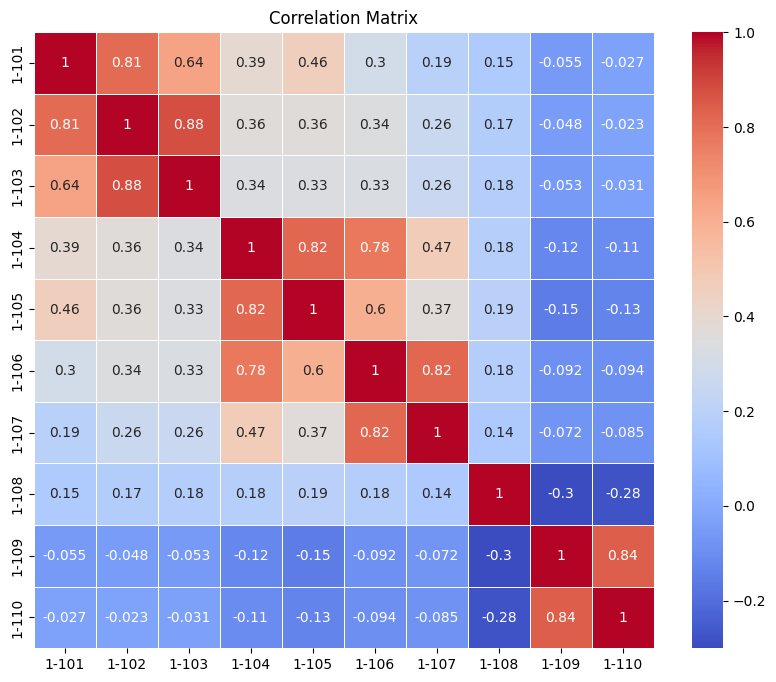

In [ ]:
# Calculate the correlation matrix
corr_matrix = df[num_cols].corr()

# Plot the correlation matrix using heatmap
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

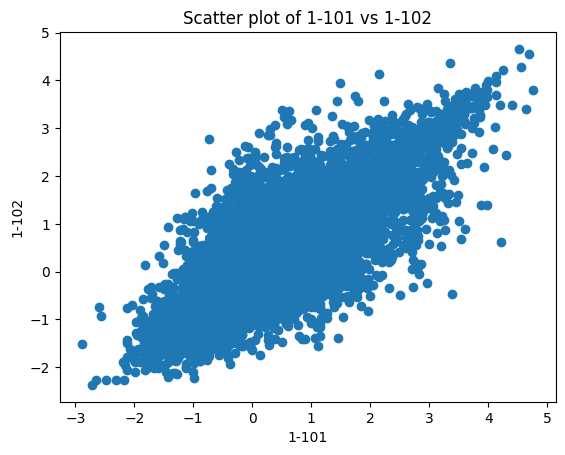

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
num_cols = ['1-101', '1-102', '1-103', '1-104', '1-105', '1-106', '1-107', '1-108', '1-109', '1-110']

plt.figure()
plt.scatter(df[num_cols[0]], df[num_cols[1]])
plt.xlabel(num_cols[0])
plt.ylabel(num_cols[1])
plt.title(f'Scatter plot of {num_cols[0]} vs {num_cols[1]}')
plt.show()

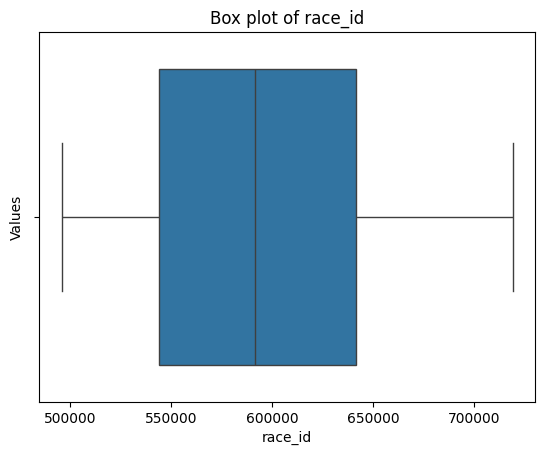

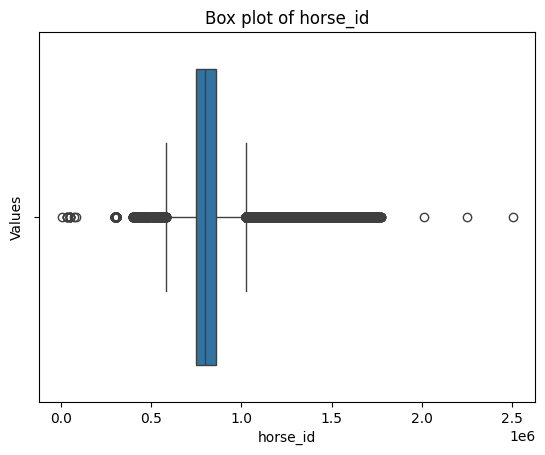

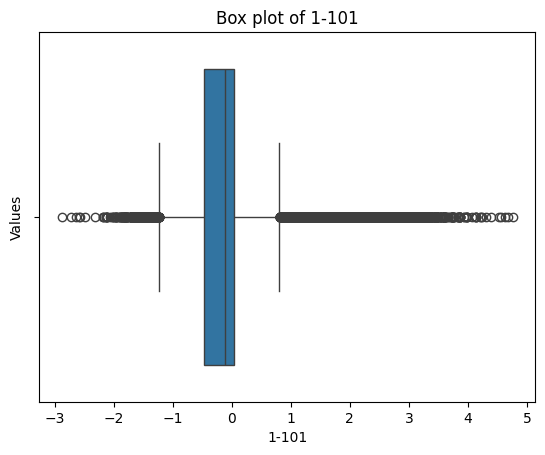

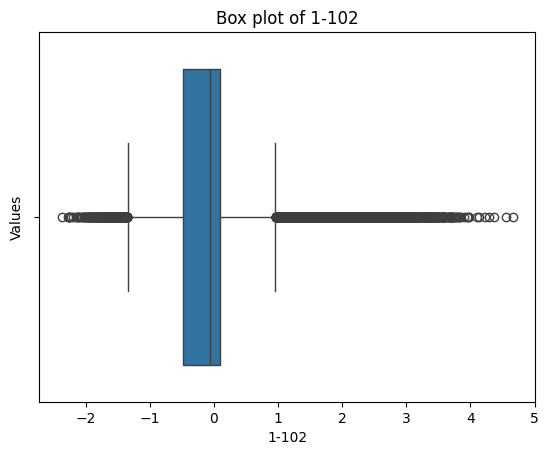

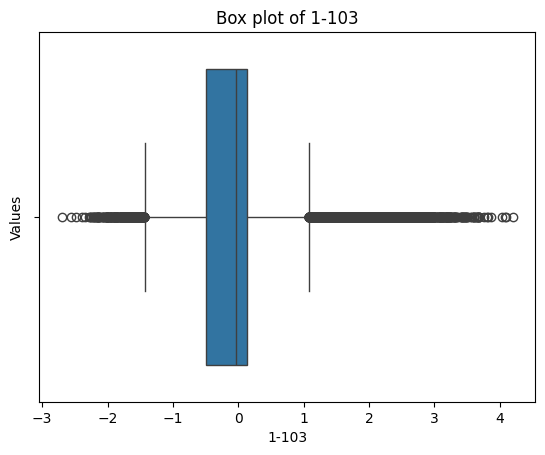

In [ ]:
# Plot box plots for the first 5 columns
for col in df.iloc[:, :5].columns:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Values')
    plt.show()

5. issues


The issue with the dataset is missing values represented by empty cells in various columns. To address this problem, you can handle missing data in the following ways: Data Imputation: One common approach is to impute missing values with the mean, median, or mode of the respective column. This can help maintain the integrity of the dataset and prevent bias in the analysis. Dropping Rows or Columns: If the missing values are extensive or cannot be imputed accurately, you may consider dropping rows or columns with a significant number of missing values. However, this should be done carefully to avoid losing valuable information. Advanced Imputation Techniques: For more complex datasets, advanced imputation techniques like K-Nearest Neighbors (KNN) or Multiple Imputation can be used to predict missing values based on other available data.

6 And 7 one hot encoding on race and horse  coloumns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [ ]:
enc = OneHotEncoder(sparse_output=False)
enc_cols = ['race_id', 'horse_id']
enc_df = pd.DataFrame(enc.fit_transform(df[enc_cols]), columns=enc.get_feature_names_out(enc_cols))
df = pd.concat([df.drop(enc_cols, axis=1), enc_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


8 MLP classifier

In [ ]:
# Split the dataset into training and testing sets
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.neural_network import MLPClassifier

# Train the MLP classifier
clf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

In [ ]:
# Evaluate the performance of the classifier
accuracy = clf.score(X_test, y_test)
print('Accuracy:', accuracy)